# Control Aprendizaje No Supervisado Especial

*Al finalizar, subir el notebook desarrollado a siveducMD*

**1.** Describa en qué consiste el análisis de componentes principales incluyendo las propiedades que cumplen las dos primeras componentes principales y su proyección de los datos en ellas. Explique bajo que circunstancias es necesario considerar la 3era y 4ta componentes principales. Indique las aplicaciones más comunes del PCA.

**2.** Escoja dos de los algoritmos de agrupamiento que hemos estudiado, realice una breve descripción del algoritmo y detalle ventajas, desventajas y ejemplos de aplicación.



**Parte práctica:** 
Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de analizar si tales características permiten agrupar las canciones según género.  

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: **acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence**. 

Por otra parte hay otras variables objetivas como **duration_ms, tempo y  loudness**. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable **popularity**, cuyo valor  está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).

En este control se trata de determinar si las características aquí descritas permiten agrupar adecuadamente las canciones de acuerdo al género a la que pertenecen (primera columna de los datos)



**3.** Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14). Interprete sus resultados.
    
**4.** Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. Justifique su elección y desarrolle los agrupamientos correspondientes. Justifique los valores de los parámetros utilizados. Itere si es necesario.
    
**5.** Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales. Interprete sus resultados.

**6. La medida Purity** 

Esta es una medida útil para cuantificar la calidad del agrupamiento cuando se conoce la clase de cada observación.

Sea $N_{ij}$ el número de observaciones en el cluster $i$ que pertenecen a la clase $j$ y $N_i = \sum_{j=1}^{C} N_{ij}$  el número total de elementos del cluster $i$. Se define $p_{ij} = \frac{N_{ij}}{N_i}$ la probabilidad empírica de la clase $j$ en el cluster $i$. Se denomina **Purity** del cluster $i$ a:
$$p_i = \max_{j= 1,\cdots, C} p_{ij}$$
y la **Purity** del agrupamiento completo:
$$\text{Purity} = \sum_{i} \frac{N_i}{N} p_i$$
El rango de Purity es $[0,1]$ y cuanto mas cercano a $1$ es mejor el agrupamiento (mas cercano a las clases).

Utilice la medida Purity para establecer la calidad del agrupamiento. Realice una conclusión general de sus resultados.

 


In [4]:
#install.packages("mclust")
library(mclust)
library(cluster)
library(ggplot2)

In [12]:
datos0 <-read.csv("tiposMusica.csv",header=TRUE,sep=";", dec=".")
print(datos0[60:120,])


         genre                      artist_name
60   Classical                    Gustav Mahler
61   Classical                    Gustav Mahler
62   Classical                   Franz Schubert
63   Classical              Camille Saint-Sa‰ns
64   Classical                  Giacomo Puccini
65   Classical                   Giuseppe Verdi
66   Classical                      Terry Riley
67   Classical            Johann Sebastian Bach
68   Classical                    Frank Ticheli
69   Classical                  Richard Strauss
70   Classical             Ludwig van Beethoven
71   Classical                  Guillaume Dufay
72  Electronic                       Bassnectar
73  Electronic                Nightmares On Wax
74  Electronic                     Nicolas Jaar
75  Electronic                      12th Planet
76  Electronic                        DJ Shadow
77  Electronic                       Portishead
78  Electronic                Nightmares On Wax
79  Electronic                 Boards of

In [13]:
table(datos0[,1])


 Classical Electronic       Rock 
        71         39         39 

   popularity     acousticness       danceability     duration_ms    
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   : 31787  
 1st Qu.:29.00   1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787  
 Median :41.00   Median :0.816000   Median :0.3770   Median :210960  
 Mean   :38.83   Mean   :0.609778   Mean   :0.3926   Mean   :219232  
 3rd Qu.:53.00   3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :865940  
     energy        instrumentalness     liveness         loudness      
 Min.   :0.00211   Min.   :0.00000   Min.   :0.0504   Min.   :-46.122  
 1st Qu.:0.07260   1st Qu.:0.00315   1st Qu.:0.0995   1st Qu.:-24.606  
 Median :0.25500   Median :0.47500   Median :0.1150   Median :-14.592  
 Mean   :0.35131   Mean   :0.45033   Mean   :0.1789   Mean   :-17.134  
 3rd Qu.:0.59700   3rd Qu.:0.89300   3rd Qu.:0.1570   3rd Qu.: -9.127  
 Max.   :0.97700   Max.   :0.95800   Max.   :0.9720   Max.   : -0.747  
  spee

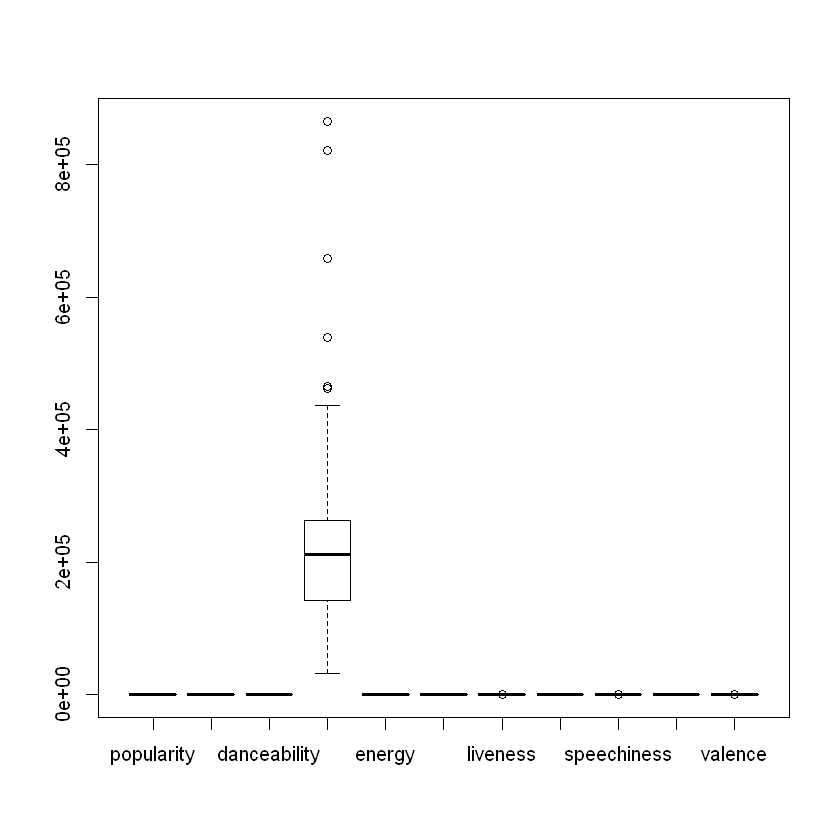

In [14]:
datos <- datos0[,4:14]
summary(datos)
boxplot(datos)

In [10]:
#implementación de Purity
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}